# Web Scrapping in Python

In [ ]:
- beautifulsoup
- selenium

In [ ]:
#pip install beautifulsoup4

In [ ]:
#pip install requests

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

name of items
old price
new price
dicount percentage
rating 

In [3]:
url = "https://www.jumia.com.ng/catalog/?q=watch"

In [4]:
html = requests.get(url)

In [5]:
html.content

b'<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charset="utf-8"/><title>Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria</title><meta property="og:type" content="product"/><meta property="og:site_name" content="Jumia Nigeria"/><meta property="og:title" content="Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria"/><meta property="og:description" content="Enjoy amazing discounts and deals up to 70% on your favourite iPhones, android devices, TVs, Cookers and more offers at the best prices on Jumia Nigeria."/><meta property="og:url" content="/catalog/"/><meta property="og:image" content="https://ng.jumia.is/cms/jumialogonew.png"/><meta property="og:locale" content="en_NG"/><meta name="title" content="Shop All Products - TVs, Laptops, Fashion Items | Jumia Nigeria"/><meta name="robots" content="noindex,follow"/><meta name="description" content="Enjoy amazing discounts and deals up to 70% on your favourite iPhones, android devices, TVs, Cookers and more of

In [6]:
soup = bs(html.content)

In [7]:
soup.find("h3", class_="name").text

'Ultra Smartwatch 8 Men Ultra Women IP67 Waterproof Series8 Wireless Charging'

In [8]:
#soup.find("h3", attrs={"class":"name"}).get_text(strip=True)

# list of items name

In [9]:
all_items_name=soup.find_all("h3", class_="name")

In [10]:
len(all_items_name)

40

# Old Price

In [11]:
old_price=soup.find_all("div", class_="old")

In [12]:
len(old_price)

38

# New Price

In [111]:
new_price=soup.find_all("div", class_="prc")
len(new_price)

40

# Discount

In [36]:
dicount=soup.find_all("div", class_="bdg _dsct _sm")
len(dicount)

38

# Rating 

In [54]:
rating=soup.find_all("div", class_="stars _s")


# No of people that rated

In [56]:
num_of_people_rated=soup.find_all("div", class_="rev")

In [52]:
soup.find("div", class_="rev").text.split("(")[1].strip(")")

'66'

find ::: it will return a single item on the page
find_all::: it will return list of all items on the page

In [94]:
# # for illustration
# for item in num_of_people_rated:
#     print(item.text.split("(")[1].strip(")"))

In [126]:
t = {
    "item name": [],
    "old price": [],
    "price": [],
    "num_of_people_rated":[], 
    "Rating":[],
    "discount":[]}

In [127]:
try:
    for people in num_of_people_rated:
        t["num_of_people_rated"].append(people.text.split("(")[1].strip(")"))
except:
    t["num_of_people_rated"].append(np.nan)
try:    
    for i in rating:
        t["Rating"].append(i.text)
except:
    t["Rating"].append(np.nan)
try:    
    for i in dicount:
        t["discount"].append(i.text)
except:
    t["discount"].append(np.nan)
try:
    for i in new_price:
        t["price"].append(i.text)
except:
        t["price"].append(np.nan)
try:
    for old in old_price:
        t["old price"].append(old.text)
except:
    t["old price"].append(np.nan)
try:
    for name in all_items_name:
        t["item name"].append(name.text)
except:
    t["item name"].append(np.nan)

In [132]:
pd.DataFrame({key:pd.Series(value) for key, value in t.items()})

,item name,old price,price,num_of_people_rated,Rating,discount
0,SILICONE LED DIGITAL SPORTS ELECTRONICS WRISTW...,"₦ 5,000","₦ 1,990",66,3.9 out of 5,60%
1,Fngeen 05 Calendar Sporty Waterproof Quartz Wa...,"₦ 28,000","₦ 4,950",2237,4 out of 5,82%
2,Wlisth Luminous Tungsten Steel Waterproof Fas...,"₦ 10,763","₦ 5,322",455,4 out of 5,51%
3,Smart Watch Color Screen Sport Message Reminde...,"₦ 9,999","₦ 5,490",28,3.6 out of 5,45%
4,Curren Men Business Waterproof Watch,"₦ 15,990","₦ 15,490",167,4.5 out of 5,3%
5,Wlisth Fashionable Simple Men's Watch,"₦ 9,729","₦ 4,789",138,4.1 out of 5,51%
6,Digital Sport Watch Men Sports Watch,"₦ 3,285","₦ 1,890",341,3.6 out of 5,42%
7,Full Touch Screen Smart Watch - For Android & IOS,"₦ 9,800","₦ 8,332",56,3.7 out of 5,15%
8,2 Pieces Of Couple Luminous Led Wrist Watch,"₦ 7,265","₦ 4,990",125,3.9 out of 5,31%
9,BUSINESS MENS WRISTWATCH WITH LEATHER WALLET,"₦ 10,000","₦ 5,500",104,4 out of 5,45%


66
2237
455
28
167
138
341
56
125
104
373
64
84
26
50
359
142
30
89
66
74
223
105
12
17
119
59
78
4
33
92
15
73
23
16
13
28
11
6
215


In [64]:
for item in num_of_people_rated:
    dict1["number of that rated"].append(item.split("(")[1].strip(")"))

TypeError: 'NoneType' object is not callable

In [17]:
url="https://www.jumia.com.ng/catalog/?q=shoe"

In [18]:
html = requests.get(url)


In [25]:
soup.find("a", class_="core")

<a class="core" data-brand="Fashion" data-category="Fashion/Men's Fashion/Shoes/Formal Shoes/Slip on" data-dimension23="201875" data-dimension26="285" data-dimension27="3.7" data-dimension28="1" data-dimension37="0" data-dimension43="BLF|BLF_06|Boost|CARR|COL_321|CP_MT102|CP_MT131|Camp_45|DOW_101|DOW_253|JF23_07|Merch_190|xmas_04" data-dimension44="0" data-id="FA203FS06DVGBNAFAMZ" data-list="" data-name="Men Leather Loafers &amp; Slip-Ons" data-position="1" data-price="5.88" data-track-onclick="eecProduct" data-track-onview="eecProduct" href="/fashion-men-leather-loafers-slip-ons-78942701.html"><div class="img-c"><img alt="" class="img" data-lazy="true" data-src="https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/10/724987/1.jpg?9923" height="208" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="208"/></div><div class="info"><h3 class="name">Men Leather Loafers &amp; Slip-Ons</h3><div class="prc">₦ 5,500</div><div class="s-p

In [52]:
for i in soup.find_all("a", class_="core"):
    print(i.find("div", class_="rev").text.split("(")[1].strip(")"))

285
11
30
39
93
20
37
102
12
24
11
41
27
9
31
31
89
64
44
19
101
2
4
89
72
61
6
43
26
67
24
51
5
5
2
14
28
6
124
49


In [ ]:
h=1

t = {
    "item name": [],
    "old price": [],
    "price": [],
    "num_of_people_rated":[], 
    "Rating":[],
    "discount":[]}
while h<=50:
    url =f"https://www.jumia.com.ng/catalog/?q=shoe&page={h}#catalog-listing"
    html = requests.get(url)
    soup = bs(html.content)
    
    for i in soup.find_all("a", class_="core"):
        try:
            t["old price"].append(i.find("div", class_="old").text)
        except:
            t["old price"].append(np.nan)
        try:
            t["price"].append(i.find("div", class_="prc").text)
        except:
            t["price"].append(np.nan)
        try:
            t["item name"].append(i.find("h3", class_="name").text)
        except:
            t["item name"].append(np.nan)

        try:
            t["discount"].append(i.find("div", class_="bdg _dsct _sm").text)
        except:
            t["discount"].append(np.nan)

        try:
            t["Rating"].append(i.find("div", class_="stars _s").text)
        except:
            t["Rating"].append(np.nan)

        try:
            t["num_of_people_rated"].append(i.find("div", class_="rev").text.split("(")[1].strip(")"))
        except:
            t["num_of_people_rated"].append(np.nan)
    h+=1

In [56]:
pd.DataFrame(t)

,item name,old price,price,num_of_people_rated,Rating,discount
0,Men Leather Loafers & Slip-Ons,"₦ 9,800","₦ 5,500",285,3.7 out of 5,44%
1,ADIDAS Advantage Lifestyle Court Lace Shoes,"₦ 51,017","₦ 22,958",11,4.5 out of 5,55%
2,Male Formal Shoes Glossy Tassel Brogue Leather...,"₦ 28,798","₦ 25,400",30,4.3 out of 5,12%
3,Men's Sneakers Canvas-BROWN,"₦ 24,000","₦ 11,000",39,3.9 out of 5,54%
4,Classic Business Men Cooperate Leather Shoes- ...,"₦ 9,000","₦ 6,174",93,3.6 out of 5,31%
5,Executive Business Men Leather Loafer Shoes- B...,"₦ 9,000","₦ 4,560",20,3.4 out of 5,49%
6,Solid Kids Shoe- Black,"₦ 10,000 - ₦ 10,500","₦ 5,999",37,4 out of 5,43%
7,Men's Waterproof Business Shoes - Black,"₦ 6,664","₦ 4,618",102,3.9 out of 5,31%
8,Mens Basket Leather Half Shoe - Black,"₦ 14,800","₦ 12,780",12,4.2 out of 5,14%
9,Men Sandals Handmade Leather Breathable Hiking...,"₦ 20,118","₦ 15,200",24,4.3 out of 5,24%


In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service


# Specify the path to the ChromeDriver executable
path = "C:/Users/pc/Documents/start/chromedriver.exe"
# Create a Service object with the executable path
service = Service(path)

# Create ChromeOptions object instead of chrome_options
options = webdriver.ChromeOptions()

# Add any desired options to the ChromeOptions object
options.add_argument("--no-sandbox")  # Example: Run Chrome in headless mode

# Pass the Service object and ChromeOptions object to the webdriver.Chrome() constructor
driver = webdriver.Chrome(service=service, options=options)


url="https://www.bailii.org/ew/cases/EWCA/Civ/2014/1.html"
driver.get(url)

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 120.0.6099.225 with binary path C:\Program Files (x86)\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00446E73+48323]
	(No symbol) [0x003D9661]
	(No symbol) [0x002E5308]
	(No symbol) [0x0030634C]
	(No symbol) [0x00302093]
	(No symbol) [0x00300719]
	(No symbol) [0x00330DF5]
	(No symbol) [0x00330ADC]
	(No symbol) [0x0032A6D6]
	(No symbol) [0x0030847C]
	(No symbol) [0x0030957D]
	GetHandleVerifier [0x006AFD5D+2575277]
	GetHandleVerifier [0x006EF86E+2836158]
	GetHandleVerifier [0x006E96DC+2811180]
	GetHandleVerifier [0x004D41B0+626688]
	(No symbol) [0x003E314C]
	(No symbol) [0x003DF4B8]
	(No symbol) [0x003DF59B]
	(No symbol) [0x003D21B7]
	BaseThreadInitThunk [0x7774FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77E17C6E+286]
	RtlGetAppContainerNamedObjectPath [0x77E17C3E+238]


In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://www.booking.com/searchresults.html?ss=Goa&lang=en-us&dest_id=4127&dest_type=region&checkin=2024-05-30&checkout=2024-06-03&group_adults=2&no_rooms=1&group_children=0&selected_currency=USD"

headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.6099.225 Safari/537.36"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

print(response.status_code)

hotel_results = []

200


In [4]:
soup

<!DOCTYPE html>

<!--
You know you could be getting paid to poke around in our code?
We're hiring designers and developers to work in Amsterdam:
https://careers.booking.com/
-->
<!-- wdot-802 -->
<script nonce="bVIqLwzW5NtMD0k" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCookieBanner to be initialised
* before using (calling getValue function) it
* 2. in your js file:
*
* var privacyCookieConsent = B.require('privacyCookieConsent');
* var consent = privacyCookieConsent.getValue();
*/
B.define('privacyCookieConsent', function () {
var consentGroupIsAllowed = {
analytical: 'C0002%3A1',
marketing: 'C0004%3A1'
};
var optanonConsentCookieName = 'OptanonConsent';
var optanonBoxClosedCookieName = 'OptanonAlertBoxClosed';
var halfOfYearMillis = 180 * 2

In [5]:
import requests
from bs4 import BeautifulSoup

#url = "https://www.booking.com/searchresults.html?ss=Goa&lang=en-us&dest_id=4127&dest_type=region&checkin=2024-05-30&checkout=2024-06-03&group_adults=2&no_rooms=1&group_children=0&selected_currency=USD"
url ="https://www.waterstones.com/books/bestsellers"
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.6099.225 Safari/537.36"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

print(response.status_code)

hotel_results = []

403


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="author"/>
<title>Waterstones</title>
<link href="https://static.waterstones.com/waterstones/errors/favicon.png" rel="icon" type="image/x-icon"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<style>body{font-family:Source Sans Pro,Arial,sans-serif;font-size:15px;font-weight:300;line-height:1.2}h1{color:#000;font-family:New Baskerville,Baskerville,serif;font-size:24px;font-size:32px;font-weight:500;letter-spacing:.4px}.container{overflow:hidden}.row{display:inline-block;display:block;margin:0 auto;max-width:1280px;padding-left:10px;padding-right:10px;width:100%}</style>
<meta content="375" http-equiv="refresh"/>
</meta></head>
<body>
<div class="container">
<div class="row">
<div class="col-sm-12"><a href="https://ww
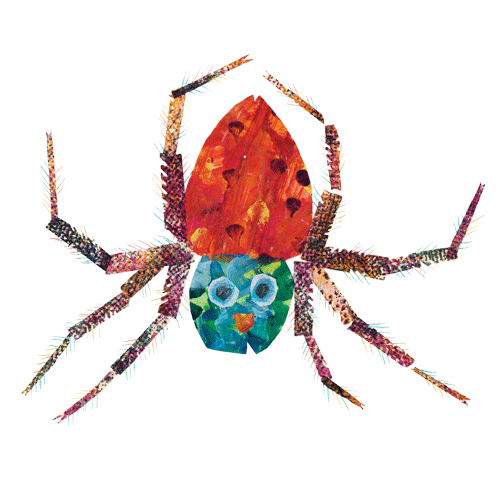

In [6]:
soup

It seems like the content of the webpage you are trying to scrape is protected by some form of anti-scraping mechanism or JavaScript rendering. The content you received appears to be encoded or obfuscated.

To scrape websites that use JavaScript to load content dynamically or employ anti-scraping measures, you might need to use a tool or library that can handle dynamic content, such as Selenium. Selenium is a web testing library that allows you to interact with a webpage, including handling JavaScript.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService

url = "https://www.waterstones.com/books/bestsellers"

# Set up the Chrome webdriver
chrome_service = ChromeService(executable_path='/path/to/chromedriver')
driver = webdriver.Chrome(service=chrome_service)

# Open the webpage
driver.get(url)

# Wait for the page to load (you might need to adjust the waiting time)
driver.implicitly_wait(10)

# Get the page source after JavaScript execution
page_source = driver.page_source

# Close the browser
driver.quit()

# Now you can use BeautifulSoup to parse the page source
soup = BeautifulSoup(page_source, 'html.parser')

# Your scraping logic here
